In [1]:
import cv2
import numpy as np 
import torch
from matplotlib import pyplot as plt

from tv_opt_layers.layers.general_tv_2d_layer import GeneralTV2DLayer

In [2]:
img = cv2.imread('butterfly.png')[:,:,::-1]

In [3]:
layer = GeneralTV2DLayer(lmbd_init=30,num_iter=10).cuda()
img_th = torch.from_numpy(np.array(img,np.float32)).permute(2,0,1).unsqueeze(0).cuda()
img_out = layer(img_th)
img_out_np = img_out[0].permute(1,2,0).cpu().detach().numpy()

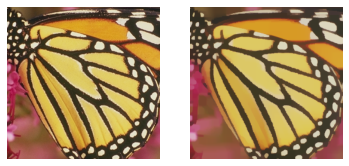

In [4]:
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(img/255)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_out_np/255)
plt.axis('off')
plt.show()

In [5]:
import torch.nn as nn

# Create a sequential model and run forward pass
model = nn.Sequential(nn.Conv2d(3,5,3), GeneralTV2DLayer(lmbd_init=30,num_iter=10)).cuda()
img_out = model(img_th)
img_out_np = img_out[0].permute(1,2,0).cpu().detach().numpy()

<Figure size 432x288 with 0 Axes>

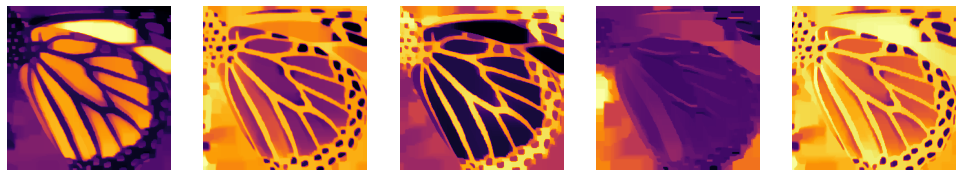

In [6]:
# Visualize result
plt.set_cmap('inferno')
plt.figure(figsize=(17,17))
for k in range(1,6):
    plt.subplot(1, 5, k)
    plt.imshow(img_out_np[:,:,k-1]/255)
    plt.axis('off')
plt.show()